<a href="https://colab.research.google.com/github/dkalan-pi/Test/blob/main/Tiger_Classification_21May2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 719 kB 34.6 MB/s 
     |████████████████████████████████| 1.2 MB 56.4 MB/s 
     |████████████████████████████████| 197 kB 71.8 MB/s 
     |████████████████████████████████| 4.2 MB 54.7 MB/s 
     |████████████████████████████████| 346 kB 73.4 MB/s 
     |████████████████████████████████| 59 kB 8.1 MB/s 
     |████████████████████████████████| 84 kB 3.4 MB/s 
     |████████████████████████████████| 212 kB 73.0 MB/s 
     |████████████████████████████████| 140 kB 68.6 MB/s 
     |████████████████████████████████| 1.1 MB 60.9 MB/s 
     |████████████████████████████████| 127 kB 70.8 MB/s 
     |████████████████████████████████| 271 kB 12.7 MB/s 
     |████████████████████████████████| 144 kB 69.3 MB/s 
     |████████████████████████████████| 94 kB 4.2 MB/s 
     |████████████████████████████████| 596 kB 67.9 MB/s 
     |████████████████████████████████| 6.6 MB 61.6 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the 

In [46]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [47]:
#s = [(lambda x: f'{x:0>6}')(num) for num  in [4, 45, 123456]]

#Term = [(lambda x:  f'{0} Tiger' )(num) for num  in ['abcd','abc bear' , 'Tiger']]
#print(s)
term = 'Tiger'

In [70]:
def search_images_ddg(term, max_images):
    "Search for `term` with DuckDuckGo and return a unique urls of about `max_images` images"
    assert max_images<1000
    url = 'https://duckduckgo.com/'
    res = urlread(url,data={'q':term}, decode=False).decode()
    searchObj = re.search(r'vqd=([\d-]+)\&', res)
    assert searchObj
    requestUrl = url + 'i.js'
    params = dict(l='us-en', o='json', q=term, vqd=searchObj.group(1), f=',,,', p='1', v7exp='a')
    urls,data = set(),{'next':1}
    while len(urls)<max_images and 'next' in data:
        try:
            data = urljson(requestUrl,data=params)
            urls.update(L(data['results']).itemgot('image'))
            requestUrl = url + data['next']
        except (URLError,HTTPError): pass
        time.sleep(0.2)
    return L(urls)



In [71]:
## Jupyter did not allow me to change the directory using CD cmd. , then
## the following piece of code used to change 
#import os 
#os.chdir ('/content/')
#!pwd

urls = search_images_ddg(term ,400)
urls



(#491) ['https://mir-s3-cdn-cf.behance.net/project_modules/1400/1c025f58324379.59f831a229253.jpg','https://www.pugdundeesafaris.com/p/wildlife-faq/images/img4.jpg','https://cincinnatizoo.org/system/assets/uploads/2011/02/43687136825_9500c9a4fd_b-813x1024.jpg','https://nypost.com/wp-content/uploads/sites/2/2019/03/cubs3.jpg?quality=90&strip=all&w=1024','https://www.woburnsafari.co.uk/globalassets/woburn-safari/2.-images/road-safari/carnivores/tigers/tiger-elton--woburn-safari-park-nov-2017-12-1.jpg?w=1440','https://live.staticflickr.com/4313/36008403452_c85031006d_b.jpg','https://www.washingtonpost.com/resizer/rENBxaZQIYiZs5cDM7eoh797Kr0=/1440x0/smart/arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/Y4GWDX4BYYZJHOCTBJ6PVJ3HDE.jpg','https://78.media.tumblr.com/2b4677ea7e11f201cbaaeb0acc5ea261/tumblr_nowwf8AxjP1utufgto1_500.jpg','https://www.prnewsonline.com/wp-content/uploads/2019/04/shutterstock_85252864.jpg','https://www.shutterbug.com/images/photo_post/[uid]/IMG_7012ar.jp

In [72]:
import os 
os.chdir ('/content/gdrive/MyDrive')
!pwd

!ls -ltr

/content/gdrive/MyDrive
total 272655
-rw------- 1 root root   245925 May 14  2019  Macbeth_by_William_Shakespeare.mobi
-rw------- 1 root root 79102255 Apr 21  2020 'Elegoo Super Starter Kit for UNO V2.0.2020.3.27.zip'
drwx------ 5 root root     4096 Jun 12  2020  OpenCV
drwx------ 2 root root     4096 Jul 15  2020  Rpi
-rw------- 1 root root      150 Aug  4  2020  ListZip.py
-rw------- 1 root root 11927637 Sep  5  2020 'ISLR Seventh Printing.pdf'
drwx------ 2 root root     4096 Sep 12  2020 'Colab Notebooks'
-rw------- 1 root root     5822 Jul  8  2021  tedy001.jpeg
-rw------- 1 root root 46962977 Jul 15  2021  export.pkl
drwx------ 3 root root     4096 Sep 23  2021  Shared
-rw------- 1 root root      143 Sep 23  2021 'Untitled form.gform'
-rw------- 1 root root 46975713 Sep 26  2021  export1.pkl
-rw------- 1 root root 46975521 Sep 26  2021  export2.pkl
-rw------- 1 root root 46982881 Sep 26  2021  export3.pkl


In [49]:
path = Path('/content/gdrive/MyDrive')

In [73]:
path

Path('/content/gdrive/MyDrive')

In [78]:
classes = ['Tiger' , 'Leopard', 'Chitha' , 'SnowLeopard']
path = Path('/content/gdrive/MyDrive/')

In [75]:
from tqdm import tqdm
if not path.exists():
    path.mkdir()
    for o in tqdm(classes):
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{o} Tiger', max_images=400)
        images = download_images(dest, urls=results)

In [77]:
#!rm  -rf 'classes'
#!rm  -rf 'export.pkl'
#!ls -lha
#!pwd
#!tree 
#!ls -lha

# first create folder in `path` and then download the images
#if not path.exists():
#    path.mkdir()
#    for o in tqdm(bear_types):
#        dest = (path/o)
#        results = search_images_ddg(f'{o} bear', max_images=100)  
#        images = download_images(dest, urls=results)


images



NameError: ignored

In [58]:
fns = get_image_files(path)
fns 

(#1) [Path('/content/gdrive/MyDrive/tedy001.jpeg')]

In [15]:
#dest = '/content/classes/classes/Leopard/00000285.jpg'
#im = Image.open(dest)
#im.to_thumb(128,128)

In [20]:
## identify the incompatible images
failed = verify_images(fns)

In [21]:
failed

(#0) []

In [59]:
## remove the uncompatible images from the lot
failed.map(Path.unlink)

(#0) []

In [60]:
spliter = RandomSplitter(valid_pct=0.2, seed=42)

In [61]:
## create the data block. Data Block is the map that describs how the list of items (i.e different Tiger catagories) 
## prepare and arrange tofeed in to dataloaders
Tigers = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [62]:
## Create the dataloader
dls = Tigers.dataloaders(path)

In [ ]:
## We can take a look at a few of those items by calling the show_batch method on a DataLoader:
dls.valid.show_batch(max_n=10, nrows=1)

In [ ]:
## By default Resize crops the images to fit a square shape of the size requested, using the full width or height. This can result in losing some important details. 
##Alternatively, you can ask fastai to pad the images with zeros (black), or squish/stretch them:
Tigers= Tigers.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = Tigers.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
## Resize with ResizeMethod.Pad, pad_mode='zeros' parameter. This will pad the images with zeros (black), 
Tigers= Tigers.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = Tigers.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:

##replace Resize with RandomResizedCrop
Tigers= Tigers.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = Tigers.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

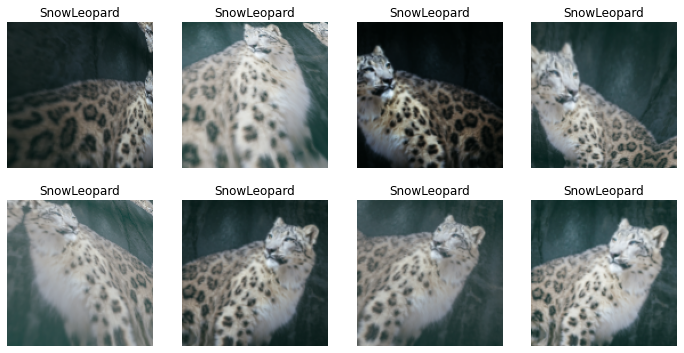

In [ ]:
##Augmentation
Tigers = Tigers.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = Tigers.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [ ]:
## We don't have a lot of data for our problem (150 pictures of each sort of bear at most), 
## so to train our model, we'll use RandomResizedCrop with an image size of 224 px,
## which is fairly standard for image classification, and default aug_transforms:

In [ ]:
Tigers = Tigers.new(item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = Tigers.dataloaders(path)

In [ ]:
## TRAIN THE MODEL ! 
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.172754,0.501032,0.108359,01:11


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 10. 
  warnings.warn(str(msg))


epoch,train_loss,valid_loss,error_rate,time
0,0.496694,0.374016,0.105263,01:12
1,0.394389,0.400537,0.111455,01:12
2,0.348054,0.350163,0.099071,01:12
3,0.303259,0.347844,0.089783,01:13


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 10. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 10. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 10. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 10. 
  warnings.warn(str(msg))


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 10. 
  warnings.warn(str(msg))


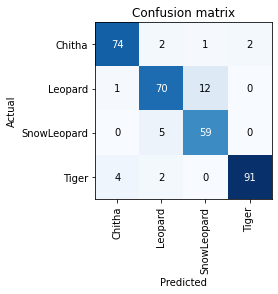

In [ ]:
##Now let's see whether the mistakes the model is making are mainly thinking that Tigers are Leopards, or that Leopard are Chithas, or something else. 
##To visualize this, we can create a confusion matrix:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

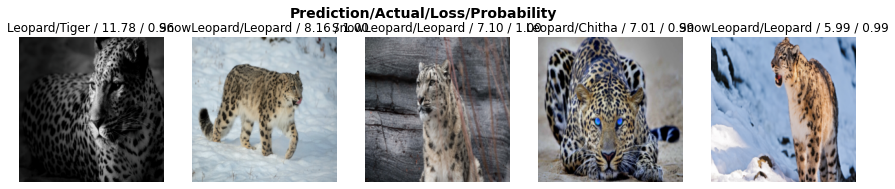

In [ ]:
## Prediction/Actual/Loss/Probability
interp.plot_top_losses(5, nrows=1)

In [ ]:

#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 10. 
  warnings.warn(str(msg))


In [ ]:
##If you need to delete the wrongly classified items from the data set run below
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
## If you need to move the wrongly classified items to the correct catagory, run the below code
##for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [ ]:
learn.export()

In [ ]:
##path = Path()
##path.ls(file_exts='.pkl')

In [ ]:
!ls -ltr

total 45896
drwxr-xr-x 1 root root     4096 Sep 16 13:40 sample_data
drwx------ 5 root root     4096 Sep 26 08:36 gdrive
drwxr-xr-x 6 root root     4096 Sep 26 10:12 classes
-rw-r--r-- 1 root root 46982881 Sep 26 10:41 export.pkl


In [ ]:
ls -ltr

total 45888
drwxr-xr-x 1 root root     4096 Sep 16 13:40 sample_data/
drwx------ 5 root root     4096 Sep 26 02:34 gdrive/
drwxr-xr-x 6 root root     4096 Sep 26 02:37 classes/
-rw-r--r-- 1 root root 46975713 Sep 26 02:59 export.pkl


In [ ]:
#import os 
#os.chdir ('/content/')
#!pwd
### Copt the .pkl file to my Google Drive folder (otherwise this .pkl file will be deleted oncw the session is closed!)
## follwo the below cmds to copy
##!cp export.pkl /content/gdrive/MyDrive/export3.pkl
##os.chdir('/content/gdrive/MyDrive/')
##!pwd
##!ls -ltr

In [ ]:
## come back to the current directory
import os 
os.chdir ('/content/')
!pwd
!ls -ltr


In [ ]:
## use the trained model for inference

In [ ]:
learn_inf = load_learner('/content/gdrive/My Drive/export3.pkl')

In [ ]:
learn_inf.predict('/content/classes/Chitha/00000166.jpg') 

In [ ]:
#learn_inf.predict('images/grizzly.jpg')
import os 
os.chdir ('/content/classes/Chitha')
!ls -ltr


In [ ]:
learn_inf.dls.vocab

['Chitha', 'Leopard', 'SnowLeopard', 'Tiger']

In [ ]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(btn_upload.data[-1])

In [ ]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: Chitha; Probability: 0.6866')

In [ ]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [ ]:
#hide_output
VBox([widgets.Label('Select your Tiger!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [ ]:
 !pwd
 !ls -ltr

/content
total 8
drwxr-xr-x 1 root root 4096 Sep 16 13:40 sample_data
drwx------ 5 root root 4096 Sep 27 12:07 gdrive
